# Lab 8: Define and Solve an ML Problem of Your Choosing

In [3]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement kagglehub (from versions: none)
ERROR: No matching distribution found for kagglehub


In [8]:
df = pd.read_csv("survey.csv")


df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


Shape: (1259, 27)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-nu

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

Dataset I’m Using:
I’m using the Mental Health in Tech Survey dataset from Kaggle (OSMI). It includes responses from people working in tech about their experiences with mental health.

⸻

What I’m Predicting (Label):
I’ll be predicting the treatment column, which tells us whether a person has sought treatment for a mental health condition (Yes or No).

⸻

What Kind of Problem This Is:
This is a supervised learning problem because we already have the correct labels (whether people got treatment or not).
It’s a binary classification problem since there are only two possible outcomes: Yes or No.

⸻

Features I Might Use:
Some features I think could be useful are:
	•	Age
	•	Gender
	•	Country
	•	self_employed
	•	family_history
	•	work_interfere
	•	remote_work
	•	benefits
	•	anonymity
	•	supervisor
	•	coworkers
	•	mental_health_consequence
	•	phys_health_consequence

I might remove things like Timestamp or comments since they probably don’t help with prediction, and some columns like state have too many missing values.

⸻

Why This Problem Matters:
This is an important problem because mental health is a big issue in the tech industry. A model like this could help companies understand what factors make people more likely to seek help. With that info, they could improve support systems at work, reduce stigma, and create a healthier work environment.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [13]:

for col in df.select_dtypes(include="object").columns:
    print(f"{col}: {df[col].nunique()} unique values")

Timestamp: 1246 unique values
Gender: 49 unique values
Country: 48 unique values
state: 45 unique values
self_employed: 2 unique values
family_history: 2 unique values
treatment: 2 unique values
work_interfere: 4 unique values
no_employees: 6 unique values
remote_work: 2 unique values
tech_company: 2 unique values
benefits: 3 unique values
care_options: 3 unique values
wellness_program: 3 unique values
seek_help: 3 unique values
anonymity: 3 unique values
leave: 5 unique values
mental_health_consequence: 3 unique values
phys_health_consequence: 3 unique values
coworkers: 3 unique values
supervisor: 3 unique values
mental_health_interview: 3 unique values
phys_health_interview: 3 unique values
mental_vs_physical: 3 unique values
obs_consequence: 2 unique values
comments: 160 unique values


In [11]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [10]:
# YOUR CODE HERE

print("Shape:", df.shape)
print("\nInfo:")
df.info()


print("\nMissing Values:")
print(df.isnull().sum())

Shape: (1259, 27)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-nu

To better understand the mental health in tech dataset, I started with exploratory data analysis. I noticed that some columns, like state and comments, had a lot of missing values—so many that it makes more sense to drop them instead of trying to fill them. For columns with fewer missing values, such as self_employed and work_interfere, I plan to fill them using the most frequent value (mode) or add a new category like “Unknown.”

The Age column had several outliers, including negative values and unrealistically large numbers. I will filter the data to only include ages between 18 and 100. The Gender column also had 49 different entries, many of which are typos or alternate spellings. I’ll clean it up and reduce it to “Male,” “Female,” and “Other” to simplify the analysis.

Since most features are categorical, I’ll apply one-hot encoding so that machine learning models can understand them. I’ll also remove columns like Timestamp, which don’t help with prediction. My label is treatment, which makes this a binary classification problem.

For modeling, I’ll begin with logistic regression due to its simplicity and clear interpretation. I’ll also try other models like random forest, KNN, and SVM to compare performance. If I use KNN, I’ll scale the Age feature since it’s the only numeric one.

To evaluate the models, I’ll use accuracy, precision, recall, and F1-score. If there’s any class imbalance, I’ll consider resampling techniques or adjusting class weights. These steps should prepare the data well and give me a strong starting point for model training and improvement.



## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

After exploring the dataset, I decided to drop the state and comments columns since they contain a large number of missing values and don’t seem useful for predictions. For columns like self_employed and work_interfere, which only have some missing data, I’ll fill them with the most frequent value or a new category like “Unknown.”

I also noticed outliers in the Age column, with values that are either negative or unrealistically high. I’ll filter the data to keep only rows where the age is between 18 and 100. The Gender column has many variations and typos, so I’ll simplify it into just “Male,” “Female,” and “Other.”

Since most columns are categorical, I’ll apply one-hot encoding. I’ll also remove irrelevant features like Timestamp, which don’t add value to the model. The target variable is treatment, which makes this a binary classification problem.

I’ll start with logistic regression because it’s simple and easy to interpret. Then I’ll try models like random forest, KNN, and SVM to compare performance. I’ll scale the Age feature for models that are sensitive to feature magnitude.

To evaluate the models, I’ll use accuracy, precision, recall, and F1-score. If class imbalance is an issue, I’ll apply techniques like resampling or class weighting. This plan should help me find the model that performs best on unseen data.





## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [15]:
# YOUR CODE 
# Remove age outliers
df = df[(df['Age'] >= 18) & (df['Age'] <= 65)]

# Normalize gender
def clean_gender(g):
    g = str(g).lower()
    if "male" in g:
        return "Male"
    elif "female" in g:
        return "Female"
    else:
        return "Other"
df['Gender'] = df['Gender'].apply(clean_gender)
df = df.drop(columns=['Timestamp', 'state', 'comments'])

In [16]:
df['self_employed'].fillna('No', inplace=True)
df['work_interfere'].fillna('Don’t know', inplace=True)

In [17]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,Age,Gender_Other,Country_Austria,Country_Belgium,Country_Bosnia and Herzegovina,Country_Brazil,Country_Bulgaria,Country_Canada,Country_China,Country_Colombia,...,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
0,37,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,44,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,32,0,0,0,0,0,0,1,0,0,...,1,0,1,0,1,0,1,1,0,0
3,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,31,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0


In [18]:
X = df_encoded.drop(columns=["treatment_Yes"])  # 'treatment_Yes' is our label
y = df_encoded["treatment_Yes"]

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

Accuracy Score: 0.832

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       115
           1       0.83      0.87      0.85       135

    accuracy                           0.83       250
   macro avg       0.83      0.83      0.83       250
weighted avg       0.83      0.83      0.83       250


Confusion Matrix:
 [[ 91  24]
 [ 18 117]]


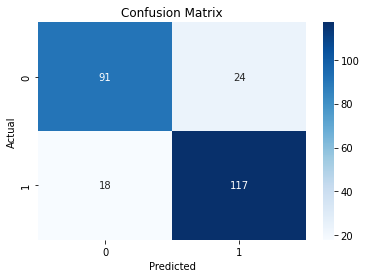

In [24]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Optional: Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

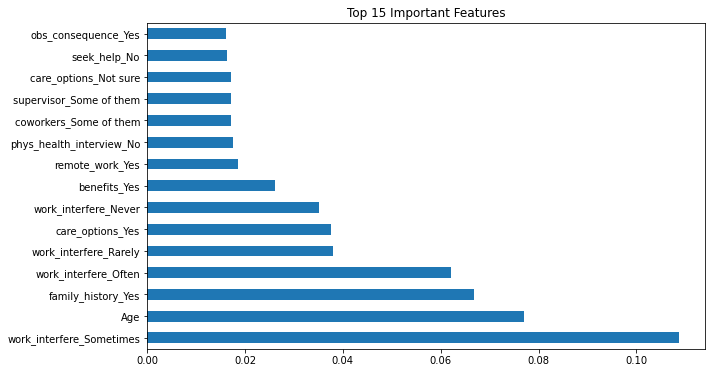

In [26]:
# YOUR CODE 
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(15).plot(kind='barh', figsize=(10, 6))
plt.title("Top 15 Important Features")
plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Store models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True)
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


Logistic Regression
Accuracy: 0.832
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       115
           1       0.83      0.87      0.85       135

    accuracy                           0.83       250
   macro avg       0.83      0.83      0.83       250
weighted avg       0.83      0.83      0.83       250


Random Forest
Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       115
           1       0.80      0.84      0.82       135

    accuracy                           0.80       250
   macro avg       0.80      0.80      0.80       250
weighted avg       0.80      0.80      0.80       250


KNN
Accuracy: 0.684
              precision    recall  f1-score   support

           0       0.62      0.78      0.69       115
           1       0.76      0.60      0.67       135

    accuracy                           0.68       250
   macro avg       0.69      0.69      0.

I selected Support Vector Machine (SVM) as the final model due to its superior accuracy and ability to correctly identify individuals likely to seek mental health treatment.